<H1>1. Problem Description</H1>

Dataset of Water Quality

This dataset for beginners for practice

https://www.kaggle.com/datasets/adityakadiwal/water-potability

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

%matplotlib inline

In [66]:
#print(os.getcwd())
df = pd.read_csv('..\data\water_potability.csv')
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<h1>2. EDA</h1>

<b>Fields Type</b>

In [67]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<b>Check nulls, duplicates and Nuniques</b>

In [68]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

The amount of missing data is 491+781+162, which is about 10% of the data. 
We'll delete the rows instead of manipulating them since it's not a significant amount.

In [69]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [70]:
df.duplicated().sum()

0

In [71]:
df.nunique()

ph                 2011
Hardness           2011
Solids             2011
Chloramines        2011
Sulfate            2011
Conductivity       2011
Organic_carbon     2011
Trihalomethanes    2011
Turbidity          2011
Potability            2
dtype: int64

<b>Clean columns from spaces</b>

In [72]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical = df.select_dtypes(include="object").columns.tolist()
numerical = df.select_dtypes(exclude="object").columns.tolist()

print(df.columns)

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')


<b>FEATURES CORRELATION (numerical)</b>

In [73]:
df.groupby('turbidity').potability.mean()

turbidity
1.450000    0.0
1.492207    1.0
1.496101    0.0
1.680554    0.0
1.812529    1.0
           ... 
6.307678    1.0
6.357439    0.0
6.389161    1.0
6.494249    1.0
6.494749    0.0
Name: potability, Length: 2011, dtype: float64

Text(0.5, 1.0, 'Variable Correlation')

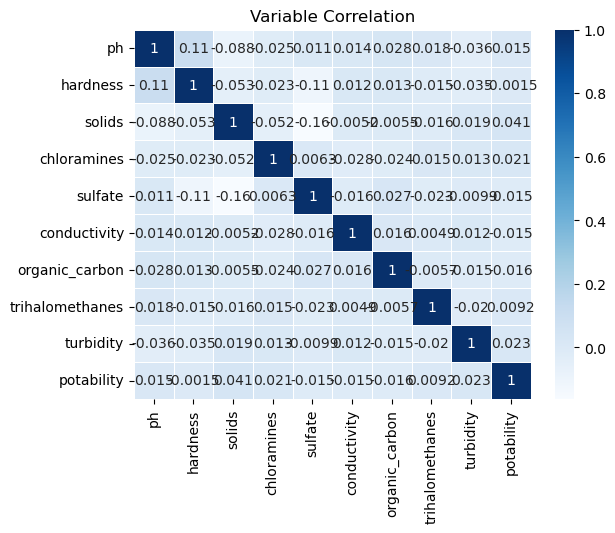

In [74]:
ax = sns.heatmap(df.corr(),annot=True, linewidths=.5, cmap=plt.cm.Blues)
plt.title('Variable Correlation')

No strong correlation between 2 variables.

<b>Price distribution</b>

<AxesSubplot:xlabel='potability', ylabel='Count'>

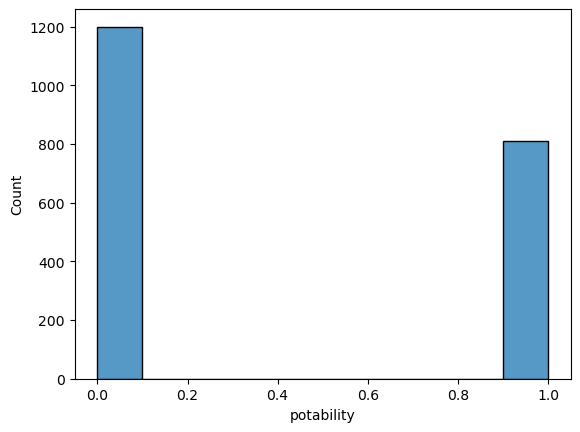

In [75]:
sns.histplot(df.potability, bins=10)

<b>Mutual_info_score for categorical features</b>

<b>Make Price categorical</b>

In [76]:
pd.cut(df.potability, bins=10).value_counts()

(-0.001, 0.1]    1200
(0.9, 1.0]        811
(0.1, 0.2]          0
(0.2, 0.3]          0
(0.3, 0.4]          0
(0.4, 0.5]          0
(0.5, 0.6]          0
(0.6, 0.7]          0
(0.7, 0.8]          0
(0.8, 0.9]          0
Name: potability, dtype: int64

In [77]:
# from sklearn.metrics import mutual_info_score
# cpotability = pd.cut(df.potability, bins=10)
# def mutual_info_price_score(series):
#     return mutual_info_score(cpotability, series)

# mi = df[categorical].apply(mutual_info_price_score)
# print(mi)
# mi.sort_values(ascending=False)

<h1>3. Model Training</h1>

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

<b>Dataset subdivision (60-20-20)</b>

In [79]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [80]:
df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.potability.values
y_full_train = df_full_train.potability.values
y_val = df_val.potability.values
y_test = df_test.potability.values

del df_train['potability']
del df_val['potability']
del df_full_train['potability']
del df_test['potability']

In [81]:
numerical.pop()

'potability'

In [82]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_full_train = dv.transform(full_train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [83]:
dv.get_feature_names()

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['chloramines',
 'conductivity',
 'hardness',
 'organic_carbon',
 'ph',
 'solids',
 'sulfate',
 'trihalomethanes',
 'turbidity']

<b>Test multiple models and check RMSE best value</b>

In [84]:
model_RMSE_scores = {}

<b>LINEAR REGRESSION<b/>

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
list_RMSE = []

model = LinearRegression(normalize=True)
model.fit(X_full_train, y_full_train)
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RMSE: 0.49911645342170996


In [87]:
key = 'Linear Regression RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE='])

In [88]:
model = LinearRegression(normalize=True)
model.fit(X_full_train, y_full_train)

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [89]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.606066882417412,
 'hardness': 248.04145326529877,
 'solids': 14609.976883468133,
 'chloramines': 6.356555064233982,
 'sulfate': 322.3565718913334,
 'conductivity': 275.31714604250067,
 'organic_carbon': 11.706095193068222,
 'trihalomethanes': 94.7752437833952,
 'turbidity': 4.581477460023954}

In [90]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0, 0.46381605561504347)

<b>RIDGE REGRESSION with alpha tuning<b/>

In [91]:
from sklearn.linear_model import Ridge

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


RMSE with alpha=0.0001: 0.49911592084121775
RMSE with alpha=0.001: 0.4991111340951659
RMSE with alpha=0.01: 0.49906389978153143
RMSE with alpha=0.05: 0.4988670495216062
RMSE with alpha=0.1: 0.4986475900678709
RMSE with alpha=0.2: 0.49827985144641956
RMSE with alpha=0.3: 0.4979845554543689
RMSE with alpha=0.4: 0.49774277046869586
RMSE with alpha=0.5: 0.4975415332692967
RMSE with alpha=0.6: 0.4973716908503592
RMSE with alpha=0.7: 0.4972266099124253
RMSE with alpha=1: 0.4968964361646534
RMSE with alpha=2: 0.49634064407424255
RMSE with alpha=3: 0.49609529189457396
RMSE with alpha=5: 0.49587124769389185
RMSE with alpha=10: 0.4956858731124381


c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce 

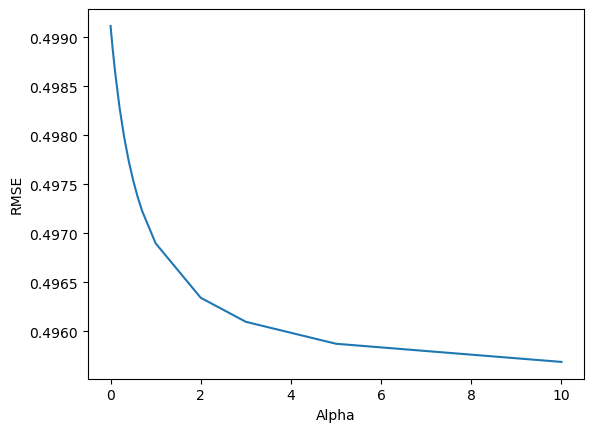

In [92]:
list_alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 3, 5, 10]
list_RMSE = []

for i in list_alpha:
    model = Ridge(alpha=i, normalize=True, random_state=42)
    model.fit(X_full_train, y_full_train)
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    list_RMSE.append(RMSE)
    print(f'RMSE with alpha={i}: {RMSE}')
    
plt.plot(list_alpha,list_RMSE)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()


In [93]:
key = 'Ridge Regression (alpha 3) RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE='])

In [94]:
model = Ridge(alpha=3, normalize=True, random_state=42)
model.fit(X_full_train, y_full_train)

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=3, normalize=True, random_state=42)

In [95]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.606066882417412,
 'hardness': 248.04145326529877,
 'solids': 14609.976883468133,
 'chloramines': 6.356555064233982,
 'sulfate': 322.3565718913334,
 'conductivity': 275.31714604250067,
 'organic_carbon': 11.706095193068222,
 'trihalomethanes': 94.7752437833952,
 'turbidity': 4.581477460023954}

In [96]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0, 0.41468889086923033)

<b>SGD REGRESSION<b/>

In [97]:
from sklearn.linear_model import SGDRegressor

In [98]:
model = SGDRegressor(random_state=42)

model.fit(X_full_train, y_full_train)
y_pred = model.predict(X_val)

RMSE = mean_squared_error(y_val, y_pred, squared=False)
print(f'RMSE: {RMSE}')


RMSE: 8.701541050151814e+16


In [99]:
key = 'SGDRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE='])

In [100]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.606066882417412,
 'hardness': 248.04145326529877,
 'solids': 14609.976883468133,
 'chloramines': 6.356555064233982,
 'sulfate': 322.3565718913334,
 'conductivity': 275.31714604250067,
 'organic_carbon': 11.706095193068222,
 'trihalomethanes': 94.7752437833952,
 'turbidity': 4.581477460023954}

In [101]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0, -5.09021580183833e+16)

<b>SVR REGRESSION<b/>

In [102]:
from sklearn.svm import SVR

In [103]:
clf_svr = SVR()
clf_svr.fit(X_full_train, y_full_train)
y_pred = clf_svr.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')



RMSE: 0.5914453572291585


In [104]:
key = 'SVR RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE='])

In [105]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.606066882417412,
 'hardness': 248.04145326529877,
 'solids': 14609.976883468133,
 'chloramines': 6.356555064233982,
 'sulfate': 322.3565718913334,
 'conductivity': 275.31714604250067,
 'organic_carbon': 11.706095193068222,
 'trihalomethanes': 94.7752437833952,
 'turbidity': 4.581477460023954}

In [106]:
y_pred = clf_svr.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0, 0.1001306876029383)

<b>RANDOM FOREST REGRESSION<b/>

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_full_train,y_full_train)
y_pred = rf.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')


RMSE: 0.4587933250783804


In [109]:
key = 'RandomForestRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE='])

In [110]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.606066882417412,
 'hardness': 248.04145326529877,
 'solids': 14609.976883468133,
 'chloramines': 6.356555064233982,
 'sulfate': 322.3565718913334,
 'conductivity': 275.31714604250067,
 'organic_carbon': 11.706095193068222,
 'trihalomethanes': 94.7752437833952,
 'turbidity': 4.581477460023954}

In [111]:
y_pred = rf.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0, 0.51)

<b>DECISION TREE REGRESSION<b/>

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_full_train,y_full_train)
y_pred = rf.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')

RMSE: 0.4587933250783804


In [114]:
key = 'DecisionTreeRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE=', 'DecisionTreeRegressor RMSE='])

In [115]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.606066882417412,
 'hardness': 248.04145326529877,
 'solids': 14609.976883468133,
 'chloramines': 6.356555064233982,
 'sulfate': 322.3565718913334,
 'conductivity': 275.31714604250067,
 'organic_carbon': 11.706095193068222,
 'trihalomethanes': 94.7752437833952,
 'turbidity': 4.581477460023954}

In [116]:
y_pred = dt.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0, 1.0)

<b>XgBOOST REGRESSION with eta, max_depth, max_child_weight TUNING<b/>

In [117]:
import xgboost as xgb

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [118]:
features = dv.get_feature_names()
features

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['chloramines',
 'conductivity',
 'hardness',
 'organic_carbon',
 'ph',
 'solids',
 'sulfate',
 'trihalomethanes',
 'turbidity']

In [119]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [120]:
watchlist = [(dfulltrain, 'train'), (dtest, 'test')]

In [121]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

[0]	train-rmse:0.43386	test-rmse:0.47903
[5]	train-rmse:0.25903	test-rmse:0.46028
[10]	train-rmse:0.18096	test-rmse:0.46686
[15]	train-rmse:0.12781	test-rmse:0.46948
[20]	train-rmse:0.08707	test-rmse:0.47152
[25]	train-rmse:0.06492	test-rmse:0.47235
[30]	train-rmse:0.04899	test-rmse:0.47152
[35]	train-rmse:0.03540	test-rmse:0.47182
[40]	train-rmse:0.02263	test-rmse:0.47113
[45]	train-rmse:0.01574	test-rmse:0.47178
[50]	train-rmse:0.01239	test-rmse:0.47174
[55]	train-rmse:0.01002	test-rmse:0.47212
[60]	train-rmse:0.00773	test-rmse:0.47196
[65]	train-rmse:0.00582	test-rmse:0.47190
[70]	train-rmse:0.00474	test-rmse:0.47178
[75]	train-rmse:0.00389	test-rmse:0.47171
[80]	train-rmse:0.00291	test-rmse:0.47168
[85]	train-rmse:0.00221	test-rmse:0.47167
[90]	train-rmse:0.00174	test-rmse:0.47168
[95]	train-rmse:0.00127	test-rmse:0.47167
[100]	train-rmse:0.00101	test-rmse:0.47165
[105]	train-rmse:0.00101	test-rmse:0.47165
[110]	train-rmse:0.00101	test-rmse:0.47165
[115]	train-rmse:0.00101	test-rms

<b>10 Rounds has the best RMSE to start with</b>

In [122]:
y_pred = model.predict(dtest)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

0.47164991240735593

In [123]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
dcheck = xgb.DMatrix(X, feature_names=features)
record

{'ph': 7.606066882417412,
 'hardness': 248.04145326529877,
 'solids': 14609.976883468133,
 'chloramines': 6.356555064233982,
 'sulfate': 322.3565718913334,
 'conductivity': 275.31714604250067,
 'organic_carbon': 11.706095193068222,
 'trihalomethanes': 94.7752437833952,
 'turbidity': 4.581477460023954}

In [124]:
y_pred = model.predict(dcheck)


original_price = y_test[3]
pred = y_pred

original_price, pred[0]

(0, 0.5612034)

<b>PARAMETERS TUNING</b>

In [125]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

<b>ETA TUNING with 10 Rounds<b/>

In [126]:
scores = {}

In [127]:
%%capture output

xgb_params = {
    'eta': 1.0,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [128]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=1.0'])

In [129]:
etas = ['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()

KeyError: 'eta=0.3'

<b>eta=0.3 in 10 Rounds has the best RMSE<b/>

<b>max_weight TUNING<b/>

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 90,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['max_depth=1', 'max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10', 'max_depth=15', 'max_depth=30', 'max_depth=60', 'max_depth=90'])

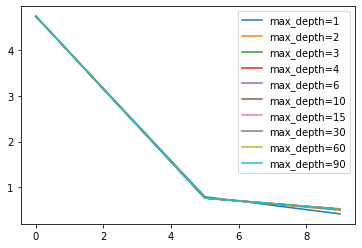

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

    
plt.legend()

<b>max_weight=1 in 10 Rounds has the best RMSE<b/>

<b>min_child_weight TUNING<b/>

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 1,
    'min_child_weight': 90,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=2', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=30', 'min_child_weight=60', 'min_child_weight=90'])

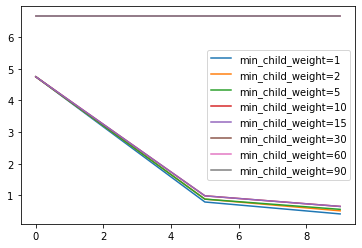

In [ ]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

plt.legend()

<b>min_child_weight=1 in 10 Rounds has the best RMSE<b/>

<b>Train the model with the best parameters</b>

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 1,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10)

In [ ]:
y_pred = model.predict(dtest)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

0.41614005

In [ ]:
key = 'xgboostRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE=', 'DecisionTreeRegressor RMSE=', 'xgboostRegressor RMSE='])

In [ ]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
dcheck = xgb.DMatrix(X, feature_names=features)

In [ ]:
y_pred = model.predict(dcheck)


original_price = y_test[3]
pred = y_pred

original_price, pred[0]

(8.0, 8.048736)

In [ ]:
model_RMSE_scores

{'Linear Regression RMSE=': 0.8717005362328303,
 'Ridge Regression (alpha 3) RMSE=': 0.5138463543966755,
 'SGDRegressor RMSE=': 1.1782828316062282,
 'SVR RMSE=': 0.4238536795607311,
 'RandomForestRegressor RMSE=': 0.769604971722506,
 'DecisionTreeRegressor RMSE=': 0.769604971722506,
 'xgboostRegressor RMSE=': 0.41614005}

<h1>4. Exporting notebook to script</h1>

<b>model.bin export data</b>

In [ ]:
import pickle

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 1,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10)

In [ ]:
output_file = f'model.bin'

In [ ]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv,model), f_out)

print(f'The Model is saved to {output_file}')

The Model is saved to model.bin
